In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    make_scorer,
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
!pip install jupyter_black
import jupyter_black

jupyter_black.load()

In [ ]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv("drive/MyDrive/data/musu_dataset.csv")
data.head()

,url,phishing,url_len,shortining_service,cnt_at,double_slash_redirecting,preffix_suffix,sub_domain,https,len_longest_word,...,cnt_suffix,TLD,cnt_qn,cnt_plus,cnt_underscore,cnt_non_latin,contains_mixed_characters,cnt_num_replacements,cnt_letter_replacements,has_ip
0,http://www.mathopenref.com/segment.html,0,39,0,0,0,0,1,0,11,...,0,com,0,0,0,0,0,0,0,0
1,http://www.onlinemathlearning.com/calculator.html,0,49,0,0,0,0,1,0,18,...,0,com,0,0,0,0,0,0,0,0
2,http://www.criaderodecaracoles.com/,0,35,0,0,0,0,1,0,19,...,0,com,0,0,0,0,0,0,0,0
3,http://www.lacartoonerie.com/,0,29,0,0,0,0,1,0,13,...,0,com,0,0,0,0,0,0,0,0
4,http://ustasb.com/officesnake/,0,30,0,0,0,0,0,0,11,...,0,com,0,0,0,0,0,0,0,0


In [4]:
data["TLD"] = data["TLD"].fillna("unknown")

# Random Forest

## DR-2025 (musu duomenu rinkinys)

In [ ]:
# Duomenu skaitymas
data = pd.read_csv("drive/MyDrive/data/musu_dataset.csv")
data["TLD"] = data["TLD"].fillna("unknown")

# Perkoduojam kategorini kintamaji i skaicius
label_encoder = LabelEncoder()
data["TLD"] = label_encoder.fit_transform(data["TLD"])

# Paruosiam mokymo/testavimo aibes
X = data.drop(columns=["url", "phishing"])
Y = data["phishing"]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# Grid search rasti geriausius parametrus
param_grid = {
    'n_estimators': [10, 100, 200, 300, 500, 700, 1000]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, Y_train)

print(f"Best number of trees: {grid_search.best_params_['n_estimators']}")

Best number of trees: 300


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=300,
                                       random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
# Tikslumo/jautrumo vertinimas ant testavimo duomenu
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

sensitivity = recall_score(Y_test, y_pred, pos_label=1)
print(f"Sensitivity (Recall): {sensitivity:.4f}")

Accuracy: 0.9545
Sensitivity (Recall): 0.9535


In [ ]:
# 10 svarbiausiu kintamuju spausdinimas
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_classifier.feature_importances_
})

feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

print(feature_importances.head(10))

             Feature  Importance
11         cnt_slash    0.201998
18               TLD    0.178031
0            url_len    0.137190
7   len_longest_word    0.087620
8            cnt_num    0.069898
12         cnt_words    0.056953
17        cnt_suffix    0.056755
10  cnt_special_char    0.040713
9           cnt_dots    0.032511
6              https    0.029146


## MD-2018

In [ ]:
data = pd.read_csv("drive/MyDrive/data/MD-2018.csv")

In [ ]:
# Paruosiam mokymo/testavimo aibes
X = data.drop(columns=['id', 'CLASS_LABEL'])
Y = data['CLASS_LABEL']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Grid search rasti geriausius parametrus
param_grid = {
    'n_estimators': [10, 100, 200, 300, 500, 700, 1000]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print(f"Best number of trees: {grid_search.best_params_['n_estimators']}")

Best number of trees: 300


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=300,
                                       random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
# Tikslumo/jautrumo vertinimas ant testavimo duomenu
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

sensitivity = recall_score(Y_test, y_pred, pos_label=1)
print(f"Sensitivity (Recall): {sensitivity:.4f}")

Accuracy: 0.9840
Sensitivity (Recall): 0.9842


In [ ]:
# 10 svarbiausiu kintamuju spausdinimas
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_classifier.feature_importances_
})

feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

print(feature_importances.head(10))

                               Feature  Importance
26                    PctExtHyperlinks    0.195101
47  PctExtNullSelfRedirectHyperlinksRT    0.175565
27                  PctExtResourceUrls    0.081185
34          FrequentDomainNameMismatch    0.074226
33       PctNullSelfRedirectHyperlinks    0.064723
4                              NumDash    0.043967
46                 ExtMetaScriptLinkRT    0.037450
13                     NumNumericChars    0.032574
29                       InsecureForms    0.030087
38                   SubmitInfoToEmail    0.025421


## MD-2020

In [ ]:
data = pd.read_csv("drive/MyDrive/data/MD-2020.csv")

In [ ]:
# Paruosiam mokymo/testavimo aibes
X = data.drop(columns=['phishing'])
Y = data['phishing']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Grid search rasti geriausius parametrus
param_grid = {
    'n_estimators': [10, 100, 200, 300, 500, 700, 1000]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print(f"Best number of trees: {grid_search.best_params_['n_estimators']}")

Best number of trees: 1000


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=1000,
                                       random_state=42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Tikslumo/jautrumo vertinimas ant testavimo duomenu
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

sensitivity = recall_score(Y_test, y_pred, pos_label=1)
print(f"Sensitivity (Recall): {sensitivity:.4f}")

Accuracy: 0.9584
Sensitivity (Recall): 0.9645


In [ ]:
# 10 svarbiausiu kintamuju spausdinimas
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_classifier.feature_importances_
})

feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

print(feature_importances.head(10))

                    Feature  Importance
57         directory_length    0.096496
100  time_domain_activation    0.084712
18               length_url    0.047397
43      qty_slash_directory    0.036719
3             qty_slash_url    0.035128
105            ttl_hostname    0.034206
99                   asn_ip    0.032167
97            time_response    0.031661
101  time_domain_expiration    0.029627
75              file_length    0.026885


# Multilayer perceptron

## DR-2025 (musu duomenu rinkinys)

In [ ]:
# Paruosiam mokymo/testavimo aibes
data = pd.read_csv("drive/MyDrive/data/musu_dataset.csv")
data["TLD"] = data["TLD"].fillna("unknown")

In [ ]:
# Perkoduojam kategorini kintamaji naudojant one hot encoder
TLD_encoded = pd.get_dummies(data['TLD'], prefix='TLD')
data = pd.concat([data.drop('TLD', axis=1), TLD_encoded], axis=1)

In [ ]:
# Mokymo/testavimo aibiu paruosimas ir GridSearch parametru parinkimui
X = data.drop(columns=['url', 'phishing'])
Y = data['phishing']

model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlp__max_iter': [1000]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

grid_search.fit(X_train, Y_train)

print("Best parameters found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:
{'mlp__hidden_layer_sizes': (100, 50), 'mlp__max_iter': 1000}


In [ ]:
# Tikslumo vertinimas and testavimo duomenu
accuracy = accuracy_score(Y_test, Y_pred)
sensitivity = recall_score(Y_test, Y_pred, pos_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")

Accuracy: 0.9497
Sensitivity: 0.9385


  0%|          | 0/100 [00:00<?, ?it/s]

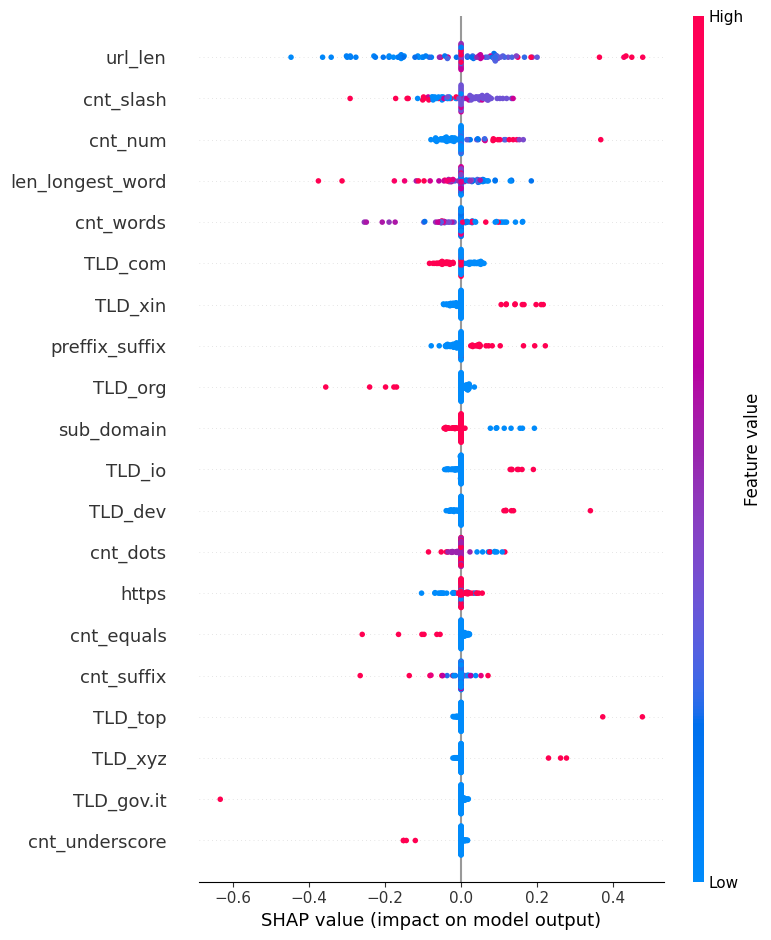


Top 10 Most Important Features (by mean SHAP value):
         feature  mean_abs_shap
         url_len       0.114287
       cnt_slash       0.051305
         cnt_num       0.038774
len_longest_word       0.038125
       cnt_words       0.036998
         TLD_com       0.029731
         TLD_xin       0.025001
  preffix_suffix       0.024560
         TLD_org       0.016853
      sub_domain       0.016726


In [ ]:
# Pasirenkam 100 stebejimu vertint kintamuju svarba
X_sample = X_train.sample(n=100, random_state=42)

scaler = model_pipeline.named_steps['scaler']
X_sample_transformed = scaler.transform(X_sample)

mlp_model = model_pipeline.named_steps['mlp']

def predict_class1_proba(X):
    return mlp_model.predict_proba(X)[:, 1]

explainer = shap.KernelExplainer(predict_class1_proba, X_sample_transformed)

shap_values = explainer.shap_values(X_sample_transformed)

shap.summary_plot(shap_values, X_sample_transformed, feature_names=X.columns)

mean_abs_shap = np.abs(shap_values).mean(axis=0)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

print("\nTop 10 Most Important Features (by mean SHAP value):")
print(feature_importance.head(10).to_string(index=False))

## MD-2018

In [ ]:
data = pd.read_csv("drive/MyDrive/data/MD-2018.csv")

In [ ]:
X = data.drop(columns=['id', 'CLASS_LABEL'])
Y = data['CLASS_LABEL']

model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlp__max_iter': [1000]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

grid_search.fit(X_train, Y_train)

print("Best parameters found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:
{'mlp__hidden_layer_sizes': (100,), 'mlp__max_iter': 1000}


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
sensitivity = recall_score(Y_test, Y_pred, pos_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")

Accuracy: 0.9770
Sensitivity: 0.9850


  0%|          | 0/100 [00:00<?, ?it/s]

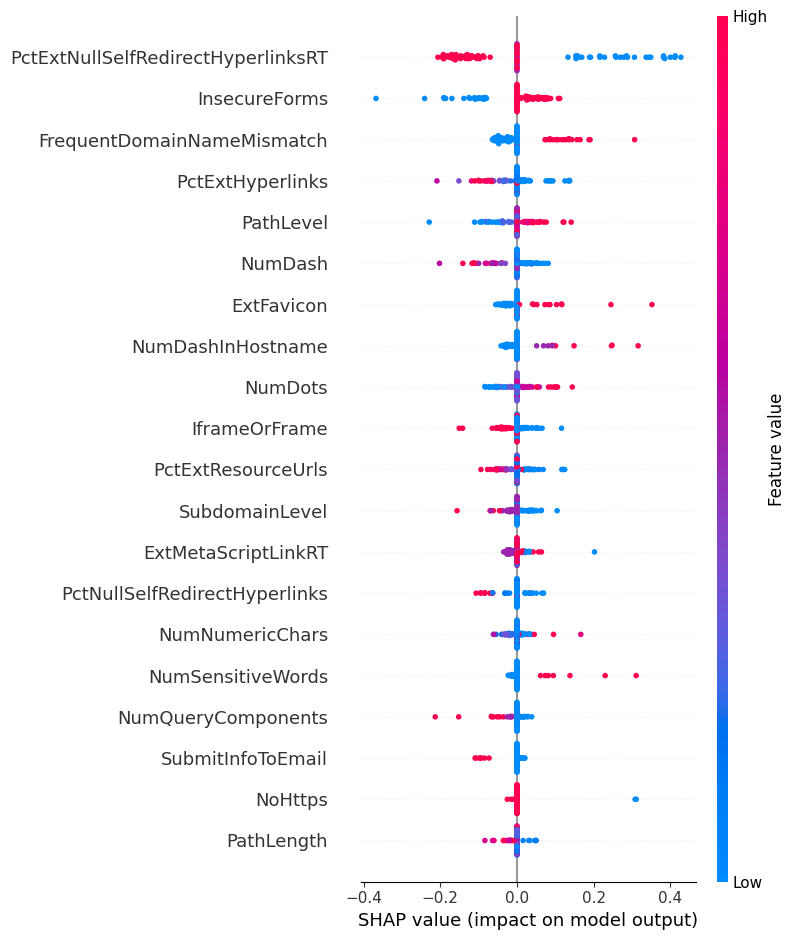


Top 10 Most Important Features (by mean SHAP value):
                           feature  mean_abs_shap
PctExtNullSelfRedirectHyperlinksRT       0.154288
                     InsecureForms       0.051646
        FrequentDomainNameMismatch       0.044687
                  PctExtHyperlinks       0.031703
                         PathLevel       0.027716
                           NumDash       0.026519
                        ExtFavicon       0.023458
                 NumDashInHostname       0.023018
                           NumDots       0.022682
                     IframeOrFrame       0.020453


In [ ]:
X_sample = X_train.sample(n=100, random_state=42)

scaler = model_pipeline.named_steps['scaler']
X_sample_transformed = scaler.transform(X_sample)

mlp_model = model_pipeline.named_steps['mlp']

def predict_class1_proba(X):
    return mlp_model.predict_proba(X)[:, 1]

explainer = shap.KernelExplainer(predict_class1_proba, X_sample_transformed)
shap_values = explainer.shap_values(X_sample_transformed)

shap.summary_plot(shap_values, X_sample_transformed, feature_names=X.columns)

mean_abs_shap = np.abs(shap_values).mean(axis=0)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

print("\nTop 10 Most Important Features (by mean SHAP value):")
print(feature_importance.head(10).to_string(index=False))

## MD-2020

In [ ]:
data = pd.read_csv("drive/MyDrive/data/MD-2020.csv")

In [ ]:
X = data.drop(columns=['phishing'])
Y = data['phishing']

model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlp__max_iter': [1000]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

grid_search.fit(X_train, Y_train)

print("Best parameters found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

Y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:
{'mlp__hidden_layer_sizes': (100,), 'mlp__max_iter': 1000}


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
sensitivity = recall_score(Y_test, Y_pred, pos_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")

Accuracy: 0.9413
Sensitivity: 0.9316


  0%|          | 0/100 [00:00<?, ?it/s]

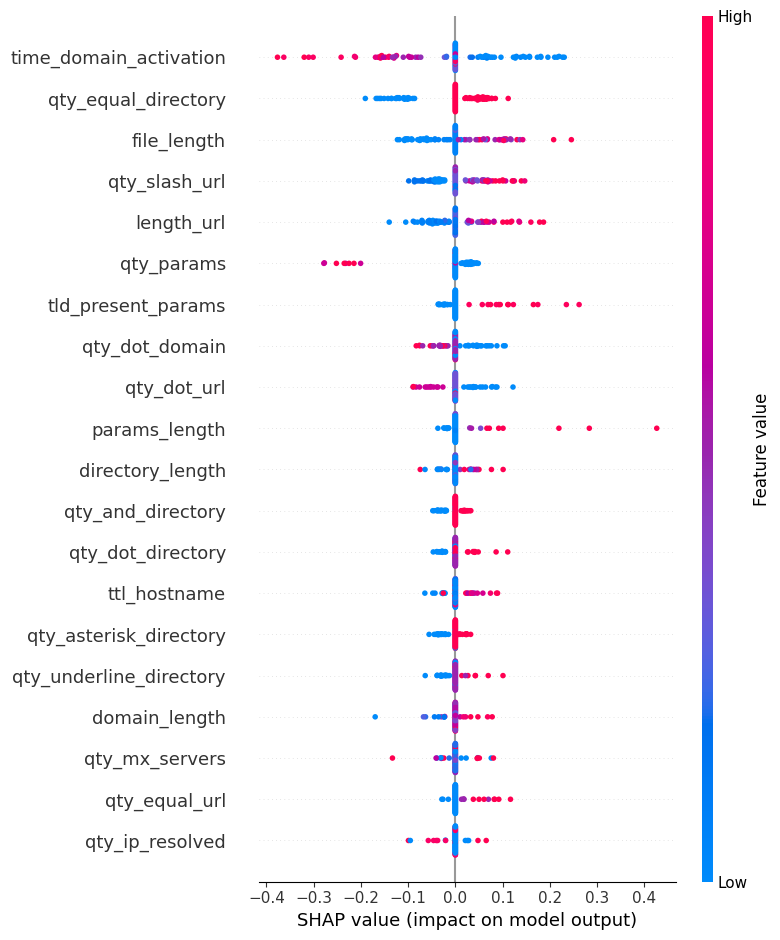


Top 10 Most Important Features (by mean SHAP value):
               feature  mean_abs_shap
time_domain_activation       0.092551
   qty_equal_directory       0.052523
           file_length       0.050185
         qty_slash_url       0.041684
            length_url       0.041666
            qty_params       0.029043
    tld_present_params       0.020462
        qty_dot_domain       0.019704
           qty_dot_url       0.017010
         params_length       0.015453


In [ ]:
X_sample = X_train.sample(n=100, random_state=42)

scaler = model_pipeline.named_steps['scaler']
X_sample_transformed = scaler.transform(X_sample)
mlp_model = model_pipeline.named_steps['mlp']

def predict_class1_proba(X):
    return mlp_model.predict_proba(X)[:, 1]

explainer = shap.KernelExplainer(predict_class1_proba, X_sample_transformed)

shap_values = explainer.shap_values(X_sample_transformed)

shap.summary_plot(shap_values, X_sample_transformed, feature_names=X.columns)

mean_abs_shap = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

print("\nTop 10 Most Important Features (by mean SHAP value):")
print(feature_importance.head(10).to_string(index=False))

# Logistinė regresija

## DR-2025

In [ ]:
data = pd.read_csv("drive/MyDrive/data/musu_dataset.csv")
data.head()

,url,phishing,url_len,shortining_service,cnt_at,double_slash_redirecting,preffix_suffix,sub_domain,https,len_longest_word,...,cnt_percent,cnt_suffix,TLD,cnt_qn,cnt_plus,cnt_underscore,cnt_non_latin,contains_mixed_characters,cnt_num_replacements,cnt_letter_replacements
0,http://www.mathopenref.com/segment.html,0,39,0,0,0,0,1,0,11,...,0,0,com,0,0,0,0,0,0,0
1,http://www.onlinemathlearning.com/calculator.html,0,49,0,0,0,0,1,0,18,...,0,0,com,0,0,0,0,0,0,0
2,http://www.criaderodecaracoles.com/,0,35,0,0,0,0,1,0,19,...,0,0,com,0,0,0,0,0,0,0
3,http://www.lacartoonerie.com/,0,29,0,0,0,0,1,0,13,...,0,0,com,0,0,0,0,0,0,0
4,http://ustasb.com/officesnake/,0,30,0,0,0,0,0,0,11,...,0,0,com,0,0,0,0,0,0,0


In [ ]:
data["TLD"] = data["TLD"].fillna("unknown")

In [ ]:
data.columns

Index(['url', 'phishing', 'url_len', 'shortining_service', 'cnt_at',
       'double_slash_redirecting', 'preffix_suffix', 'sub_domain', 'https',
       'len_longest_word', 'cnt_num', 'cnt_dots', 'cnt_special_char',
       'cnt_slash', 'cnt_words', 'port', 'cnt_equals', 'cnt_ampersand',
       'cnt_percent', 'cnt_suffix', 'TLD', 'cnt_qn', 'cnt_plus',
       'cnt_underscore', 'cnt_non_latin', 'contains_mixed_characters',
       'cnt_num_replacements', 'cnt_letter_replacements', 'has_ip'],
      dtype='object')

In [ ]:
X = data.drop(columns=["url", "phishing"])
y = data["phishing"]

### Multikolinearumo patikra

Susiduriame su multikolinearumo problema - to ir buvo tikimasi.

Stipriai koreliuoti pozymiai:
* cnt_ampersand - cnt_equals
* cnt_words - cnt_num_replacements - url_len
* cnt_suffix - cnt_special_char ---> SUFFIX PATENKA I SPECIAL CHARS

Palinus pagal prasme koreliuojancius (cnt_words, cnt_special_char, cnt_num, cnt_equals) bei cnt_num_replacement, situacija pataisoma 😃

In [ ]:
# tikri skaitiniai kintamieji
features = [
    "cnt_letter_replacements",
    # "cnt_num_replacements",
    # "cnt_words",
    "cnt_special_char",
    # "cnt_num",
    # "cnt_suffix",
    "url_len",
    "len_longest_word",
    "cnt_percent",
    # "cnt_equals",
    "cnt_underscore",
    "cnt_at",
    "cnt_dots",
    "cnt_slash",
    "cnt_ampersand",
    "cnt_qn",
    "cnt_plus",
    "cnt_non_latin",
]

X_numeric = X[features]

In [ ]:
# multikolinearumo patikrinimas
X_scaled = StandardScaler().fit_transform(X_numeric)
vif_df = pd.DataFrame()
vif_df["feature"] = X_numeric.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])
]
print(vif_df.sort_values("VIF", ascending=False))

                    feature       VIF
2                   url_len  3.269247
1          cnt_special_char  2.737930
9             cnt_ampersand  1.622136
8                 cnt_slash  1.466518
0   cnt_letter_replacements  1.442935
4               cnt_percent  1.383715
10                   cnt_qn  1.302067
3          len_longest_word  1.267570
5            cnt_underscore  1.226125
11                 cnt_plus  1.178104
7                  cnt_dots  1.171933
6                    cnt_at  1.082073
12            cnt_non_latin  1.000996


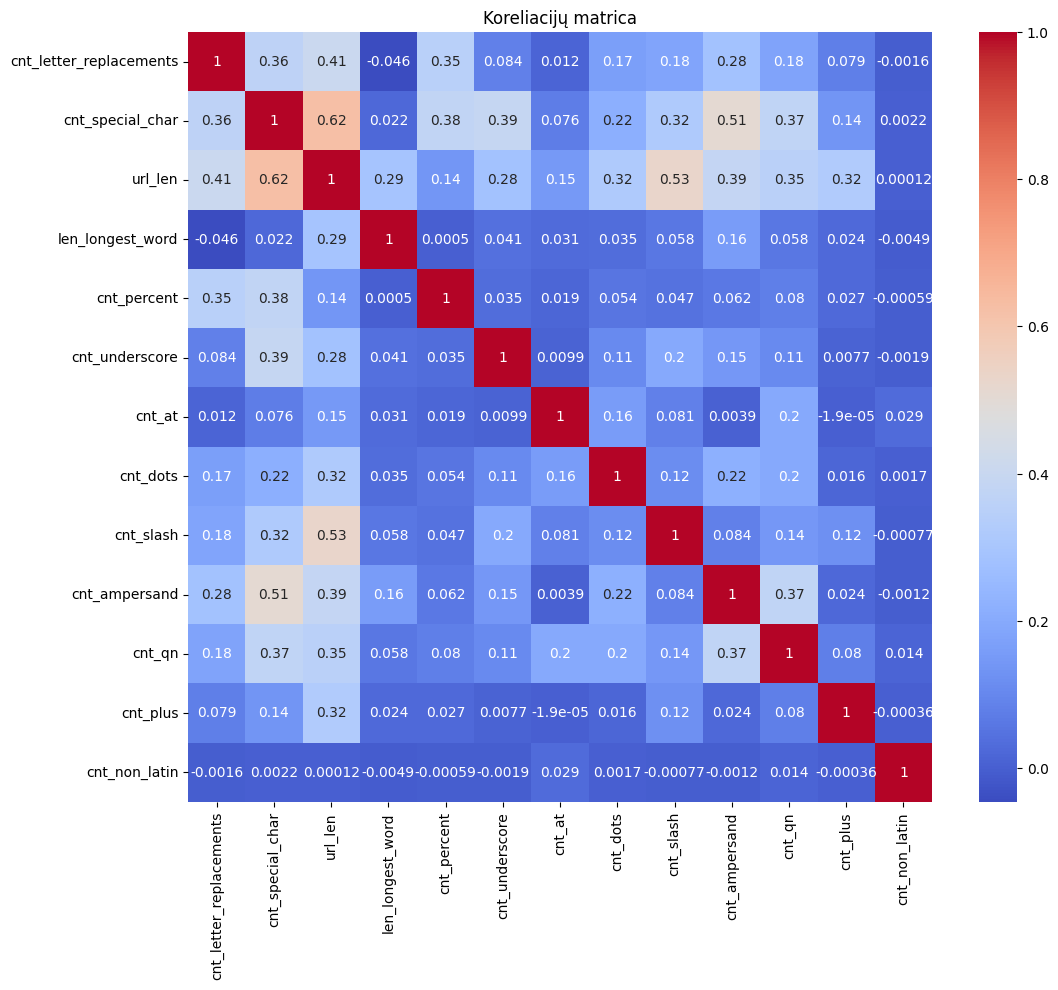

In [ ]:
# koreliacijų matrica
corr = X_numeric.corr()

# plt.figure(figsize=(12, 10))
# sns.heatmap(corr[(abs(corr) > 0.7) & (corr != 1)], annot=True, cmap="coolwarm")
# plt.title("Stipriai koreliuojantys požymiai(|corr| > 0.7)")
# plt.show()


plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Koreliacijų matrica")
plt.show();

### Kategorinių kintamųjų paruošimas modeliui

In [ ]:
# atsisakome multikolineariu pozymiu
X.drop(
    columns=[
        "cnt_at",
        "cnt_non_latin",
        "cnt_words",
        "cnt_equals",
        "TLD",
        "cnt_special_char",
        # "double_slash_redirecting",
        # "preffix_suffix",
        # "sub_domain",
        # "https",
        # "port",
        "contains_mixed_characters",
        "has_ip",
        # is multikolinearumo analizes
        "cnt_num",
        "cnt_num_replacements",
        "cnt_suffix",
    ],
    inplace=True,
)

In [ ]:
kategoriniai_kintamieji = [
    "shortining_service",
    "double_slash_redirecting",
    "preffix_suffix",
    "sub_domain",
    "https",
    "port",
    # "TLD",
    # "contains_mixed_characters",
    # "has_ip",
]

In [ ]:
X_encoded = pd.get_dummies(X, columns=kategoriniai_kintamieji, drop_first=True)
X_encoded = X_encoded.astype(int)

print(f"Final shape: {X_encoded.shape}")
print("Example columns:", X_encoded.columns)

Final shape: (20000, 16)
Example columns: Index(['url_len', 'len_longest_word', 'cnt_dots', 'cnt_slash', 'cnt_ampersand',
       'cnt_percent', 'cnt_qn', 'cnt_plus', 'cnt_underscore',
       'cnt_letter_replacements', 'shortining_service_1',
       'double_slash_redirecting_1', 'preffix_suffix_1', 'sub_domain_1',
       'https_1', 'port_1'],
      dtype='object')


In [ ]:
# multikolinearumo patikrinimas
X_scaled = StandardScaler().fit_transform(X_encoded)
vif_df = pd.DataFrame()
vif_df["feature"] = X_encoded.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])
]
print(vif_df.sort_values("VIF", ascending=False))
# ..........

                       feature       VIF
0                      url_len  2.653013
2                     cnt_dots  1.725441
3                    cnt_slash  1.560249
13                sub_domain_1  1.548578
9      cnt_letter_replacements  1.464414
4                cnt_ampersand  1.378050
6                       cnt_qn  1.267890
1             len_longest_word  1.230710
7                     cnt_plus  1.174564
5                  cnt_percent  1.144981
8               cnt_underscore  1.118114
12            preffix_suffix_1  1.090192
14                     https_1  1.084909
15                      port_1  1.073055
11  double_slash_redirecting_1  1.046649
10        shortining_service_1  1.004494


### Isskirciu analize

In [ ]:
# Pilniausias modelio variantas
X_sm = sm.add_constant(X_encoded)

logit_model = sm.Logit(y, X_sm)
result = logit_model.fit(maxiter=100)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.588789
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               phishing   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19983
Method:                           MLE   Df Model:                           16
Date:                Fri, 02 May 2025   Pseudo R-squ.:                  0.1506
Time:                        09:05:37   Log-Likelihood:                -11776.
converged:                       True   LL-Null:                       -13863.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.1391      0.080     14.244      0.000      

<ipython-input-118-9cfe48498b4b>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


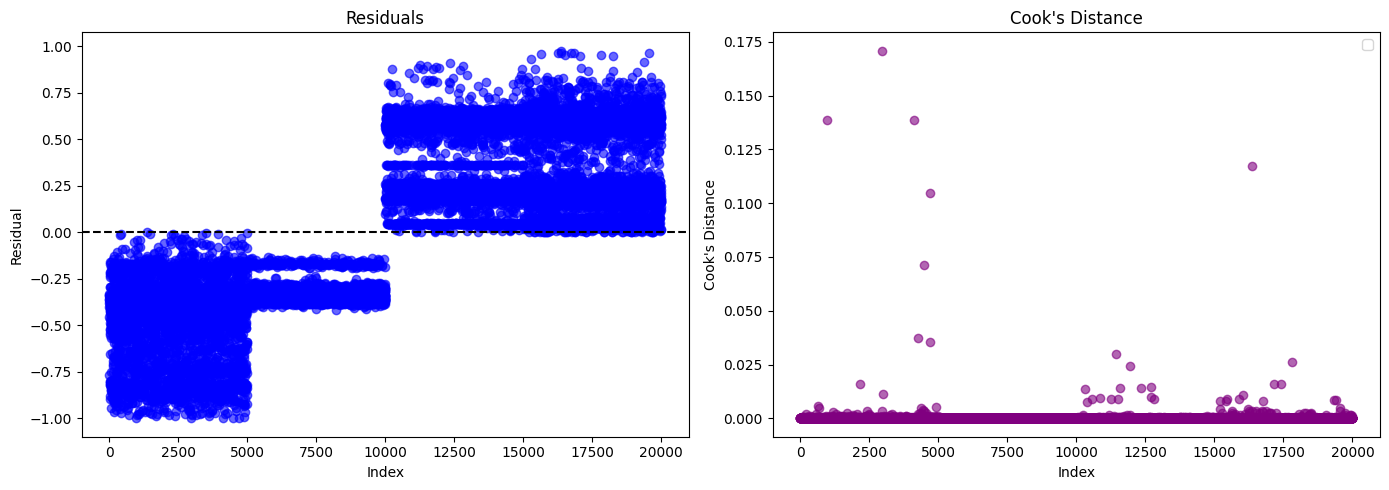

In [ ]:
# Get influence and residuals
influence = result.get_influence()
residuals = result.resid_response  # Observed - predicted
cooks_d = influence.cooks_distance[0]

# Panel of plots (Residuals and Cook’s Distance)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()

# 1. Raw residuals
axes[0].scatter(range(len(residuals)), residuals, alpha=0.6, color="blue")
axes[0].axhline(y=0, color="black", linestyle="--")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Residual")
axes[0].set_title("Residuals")

# 2. Cook's Distance
axes[1].scatter(range(len(cooks_d)), cooks_d, alpha=0.6, color="purple")
# axes[1].axhline(
#     y=4 / len(cooks_d), color="red", linestyle="--", label="Threshold ≈ 4/n"
# )
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Cook's Distance")
axes[1].set_title("Cook's Distance")
axes[1].legend()

plt.tight_layout()
plt.show();

# Kuko > 1 nera
# kitu tipu isskirciu nera straight forward budo suskaiciuoti
# reiks permaisyt rinkini pries galutini modeli

### Modelio vertinimas

In [ ]:
# pasidalinsiu jau ready data, kad nereiketu visko kartot is naujo
X_encoded["phishing"] = data["phishing"]
data_log = X_encoded.copy()

In [ ]:
train_df, test_df = train_test_split(
    data_log, test_size=0.2, stratify=data["phishing"], random_state=42
)

In [ ]:
selected_features = [
    "url_len",
    "len_longest_word",
    "cnt_dots",
    "cnt_slash",
    "cnt_ampersand",
    "cnt_percent",
    # "cnt_qn",
    "cnt_plus",
    "cnt_underscore",
    "cnt_letter_replacements",
    "shortining_service_1",
    # "double_slash_redirecting_1",
    "preffix_suffix_1",
    "sub_domain_1",
    # "https_1",
    "port_1",
]

In [ ]:
formula = "phishing ~ " + " + ".join(selected_features)

In [ ]:
logit_model = smf.logit(formula=formula, data=train_df)
logit_result = logit_model.fit()
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.590270
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               phishing   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15986
Method:                           MLE   Df Model:                           13
Date:                Fri, 02 May 2025   Pseudo R-squ.:                  0.1484
Time:                        09:06:00   Log-Likelihood:                -9444.3
converged:                       True   LL-Null:                       -11090.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.1555      0.081     14.296      0.000       0.997   

In [ ]:
y_pred_prob = logit_result.predict(test_df)
y_pred = (y_pred_prob >= 0.5).astype(int)


print("Accuracy:", accuracy_score(test_df["phishing"], y_pred))
print(
    "Sensitivity (recall for phishing=0):",
    recall_score(test_df["phishing"], y_pred, pos_label=0),
)

Accuracy: 0.67975
Sensitivity (recall for phishing=0): 0.8625


**Pradinis modelis**
* Sensitivity =  0.8615
* Accuracy = 0.68


**Be double_slash_redirecting modelis**
* Sensitivity =  0.862
* Accuracy = 0.680

**Be http modelis**
* Sensitivity =  0.863
* Accuracy = 0.680

**Be cnt_qn modelis**
* Sensitivity =  0.863
* Accuracy = 0.680


### Lasso regresija

In [ ]:
numeric = [
    "cnt_letter_replacements",
    "cnt_num_replacements",
    "cnt_words",
    "cnt_special_char",
    "cnt_num",
    "cnt_suffix",
    "url_len",
    "len_longest_word",
    "cnt_percent",
    "cnt_equals",
    "cnt_underscore",
    "cnt_at",
    "cnt_dots",
    "cnt_slash",
    "cnt_ampersand",
    "cnt_qn",
    "cnt_plus",
    "cnt_non_latin",
]

In [ ]:
categorical = [
    "shortining_service",
    "double_slash_redirecting",
    "preffix_suffix",
    "sub_domain",
    "https",
    "port",
    "TLD",
    "contains_mixed_characters",
    "has_ip",
]

In [ ]:
X = data[categorical + numeric]
y = data["phishing"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

#### Hiperparametrų atranka

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical),
    ]
)

pipeline = Pipeline(
    steps=[("preprocess", preprocessor), ("model", LogisticRegression(max_iter=1000))]
)

In [ ]:
param_grid = [
    {
        "model__penalty": ["l1"],
        "model__solver": ["liblinear", "saga"],
        # "model__C": [0.01, 0.1, 1, 10, 100],
        "model__C": [800, 1000, 1200, 1500, 1800, 2000],
    },
    # {
    #     "model__penalty": ["l2"],
    #     "model__solver": ["liblinear", "saga", "lbfgs"],
    #     "model__C": [0.01, 0.1, 1, 10, 100],
    # },
    # {
    #     "model__penalty": ["elasticnet"],
    #     "model__solver": ["saga"],
    #     "model__l1_ratio": [0.1, 0.5, 0.9],
    #     "model__C": [0.01, 0.1, 1, 10, 100],
    # },
]

In [ ]:
scoring = {
    "accuracy": "accuracy",
    "recall_phishing": make_scorer(recall_score, pos_label=1),  # sensitivity
    "precision_phishing": "precision",
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=scoring,
    refit="recall_phishing",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['cnt_letter_replacements',
                                                                          'cnt_num_replacements',
                                                                          'cnt_words',
                                                                          'cnt_special_char',
                                                                          'cnt_num',
                                                                          'cnt_suffix',
                                                                          'url_len',
                                                                          'len_longest_word',
                                                                          'cnt_percent',
                                                                          'cnt_equals',
                                                                          'cnt_underscore',
                                                                          'cnt_at',
                                                                          'cnt_dots',
                                                                          'cnt_slash',
                                                                          'cnt_ampersand',
                                                                          'cnt_qn',
                                                                          'c...
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'model__C': [800, 1000, 1200, 1500, 1800, 2000],
                          'model__penalty': ['l1'],
                          'model__solver': ['liblinear', 'saga']}],
             refit='recall_phishing',
             scoring={'accuracy': 'accuracy', 'precision_phishing': 'precision',
                      'recall_phishing': make_scorer(recall_score, response_method='predict', pos_label=1)},
             verbose=1)

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'model__C': 1500, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best score: 0.82125


In [ ]:
# visi rezultatai
results_df = pd.DataFrame(grid_search.cv_results_)

cols_to_show = [
    "params",
    "mean_test_accuracy",
    "mean_test_recall_phishing",
    "mean_test_precision_phishing",
    "rank_test_recall_phishing",
]

In [ ]:
results_df[cols_to_show].sort_values(by="rank_test_recall_phishing")

,params,mean_test_accuracy,mean_test_recall_phishing,mean_test_precision_phishing,rank_test_recall_phishing
6,"{'model__C': 1500, 'model__penalty': 'l1', 'mo...",0.880625,0.821250,0.931962,1
0,"{'model__C': 800, 'model__penalty': 'l1', 'mod...",0.880812,0.821125,0.932488,2
8,"{'model__C': 1800, 'model__penalty': 'l1', 'mo...",0.880687,0.821125,0.932216,2
10,"{'model__C': 2000, 'model__penalty': 'l1', 'mo...",0.880938,0.821000,0.932881,4
2,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",0.880687,0.821000,0.932340,5
4,"{'model__C': 1200, 'model__penalty': 'l1', 'mo...",0.880812,0.820875,0.932729,6
3,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",0.869063,0.797500,0.930779,7
1,"{'model__C': 800, 'model__penalty': 'l1', 'mod...",0.869063,0.797500,0.930779,7
7,"{'model__C': 1500, 'model__penalty': 'l1', 'mo...",0.869063,0.797500,0.930779,7
5,"{'model__C': 1200, 'model__penalty': 'l1', 'mo...",0.869063,0.797500,0.930779,7


#### Modelio vertinimas

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            categorical,
        ),
    ]
)


lasso_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        (
            "model",
            LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000, C=800),
        ),  # Lasso
    ]
)

In [ ]:
lasso_pipeline.fit(X_train, y_train)
y_pred = lasso_pipeline.predict(X_test)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cnt_letter_replacements',
                                                   'cnt_num_replacements',
                                                   'cnt_words',
                                                   'cnt_special_char',
                                                   'cnt_num', 'cnt_suffix',
                                                   'url_len',
                                                   'len_longest_word',
                                                   'cnt_percent', 'cnt_equals',
                                                   'cnt_underscore', 'cnt_at',
                                                   'cnt_dots', 'cnt_slash',
                                                   'cnt_ampersand', 'cnt_qn',
                                                   'cnt_plus',
                                                   'cnt_non_latin']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['shortining_service',
                                                   'double_slash_redirecting',
                                                   'preffix_suffix',
                                                   'sub_domain', 'https',
                                                   'port', 'TLD',
                                                   'contains_mixed_characters',
                                                   'has_ip'])])),
                ('model',
                 LogisticRegression(C=800, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall for phishing=0):", recall_score(y_test, y_pred, pos_label=1))
print("Specificity:", recall_score(y_test, y_pred, pos_label=0))

Accuracy: 0.888
Sensitivity (Recall for phishing=0): 0.831
Specificity: 0.945


In [ ]:
# pozymiu reiksmingumas

logreg_model = lasso_pipeline.named_steps["model"]

coefficients = logreg_model.coef_[0]

one_hot_columns = (
    lasso_pipeline.named_steps["preprocess"]
    .transformers_[1][1]
    .get_feature_names_out(categorical)
)

all_feature_names = numeric + list(one_hot_columns)

feature_importance = pd.DataFrame(
    {"Feature": all_feature_names, "Coefficient": coefficients}
)

feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance_sorted = feature_importance.sort_values(
    by="Abs_Coefficient", ascending=False
)

print(feature_importance_sorted[["Feature", "Coefficient", "Abs_Coefficient"]].head(10))

      Feature  Coefficient  Abs_Coefficient
181  TLD_goog    20.406056        20.406056
406   TLD_xin    15.475748        15.475748
44    TLD_app    14.370118        14.370118
394   TLD_vip    14.112190        14.112190
213  TLD_help    12.137546        12.137546
362  TLD_shop    11.868722        11.868722
354   TLD_sbs    11.846779        11.846779
139   TLD_edu   -11.790777        11.790777
220   TLD_icu    11.469127        11.469127
64   TLD_blog    11.457457        11.457457


In [ ]:
# atfiltravus "TLD"
filtered_features = feature_importance_sorted[
    ~feature_importance_sorted["Feature"].str.startswith("TLD")
]


filtered_sorted = filtered_features.sort_values(by="Abs_Coefficient", ascending=False)


print(filtered_sorted[["Feature", "Coefficient", "Abs_Coefficient"]].head(10))

                       Feature  Coefficient  Abs_Coefficient
2                    cnt_words    -4.433976         4.433976
23                      port_1    -3.569082         3.569082
1         cnt_num_replacements     3.380474         3.380474
4                      cnt_num     1.814269         1.814269
21                sub_domain_1    -1.751206         1.751206
19  double_slash_redirecting_1    -1.701137         1.701137
20            preffix_suffix_1     1.511247         1.511247
6                      url_len     1.436600         1.436600
11                      cnt_at     1.415988         1.415988
13                   cnt_slash     0.937878         0.937878


## MD-2018

In [ ]:
md2018 = pd.read_csv("drive/MyDrive/data/MD-2018.csv", index_col=0)
md2018.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
2,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
3,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
4,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
5,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
md2018.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

In [ ]:
X_md2018 = md2018.drop(columns=["CLASS_LABEL"])
y_md2018 = md2018["CLASS_LABEL"]

### Multikolinearumo patikra

In [ ]:
numeric_features = [
    "NumDots",
    "SubdomainLevel",
    # "PathLevel", #mul
    "UrlLength",
    "NumDash",
    "NumDashInHostname",
    "NumUnderscore",
    "NumPercent",
    "NumQueryComponents",
    # "NumAmpersand",  # mul
    "NumHash",
    # "NumNumericChars", #mul2
    "HostnameLength",
    # "PathLength",  #mul
    # "QueryLength", #mul
    # "NumSensitiveWords", #mult2
    # "PctExtHyperlinks",  # nekonverguoja modelis
    # "PctExtResourceUrls",  # nekonverguoja modelis
    "PctNullSelfRedirectHyperlinks",
    # "SubdomainLevelRT", #mul
    # "UrlLengthRT", #mul
    # "PctExtResourceUrlsRT", #mul
    "ExtMetaScriptLinkRT",
    # "PctExtNullSelfRedirectHyperlinksRT", #mul
]

md2018_numeric = md2018[numeric_features]

In [ ]:
X_scaled_md = StandardScaler().fit_transform(md2018_numeric)
vif_df = pd.DataFrame()
vif_df["feature"] = md2018_numeric.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_scaled_md, i) for i in range(X_scaled_md.shape[1])
]
print(vif_df.sort_values("VIF", ascending=False))

                          feature       VIF
2                       UrlLength  2.704070
9                  HostnameLength  2.347406
1                  SubdomainLevel  2.135696
0                         NumDots  2.023444
3                         NumDash  1.882717
7              NumQueryComponents  1.593019
4               NumDashInHostname  1.493684
5                   NumUnderscore  1.308697
8                         NumHash  1.281637
10  PctNullSelfRedirectHyperlinks  1.151004
11            ExtMetaScriptLinkRT  1.082875
6                      NumPercent  1.064420


### Kategoriniu kintamuju paruosimas

In [ ]:
categorical_features = [
    "AtSymbol",
    # "TildeSymbol",
    # "EmbeddedBrandName",
    # "NoHttps",
    # "RandomString",
    # "IpAddress",
    # "DomainInSubdomains",
    # "DomainInPaths",
    # "HttpsInHostname",
    # "DoubleSlashInPath",
    # "ExtFavicon",
    # "InsecureForms",
    # "RelativeFormAction",
    # "ExtFormAction",
    # "AbnormalFormAction",
    # "FrequentDomainNameMismatch",
    # "FakeLinkInStatusBar",
    # "RightClickDisabled",
    # "PopUpWindow",
    # "SubmitInfoToEmail",
    # "IframeOrFrame",
    # "MissingTitle",
    # "ImagesOnlyInForm",
    # "AbnormalExtFormActionR",
]

In [ ]:
# atsisakome multikolineariu pozymiu
X_md2018.drop(
    columns=[
        "PathLevel",  # mul
        "NumAmpersand",  # mul
        "NumNumericChars",  # mul2
        "PathLength",  # mul
        "QueryLength",  # mul
        "NumSensitiveWords",  # mult2
        "PctExtHyperlinks",  # nekonverguoja modelis
        "PctExtResourceUrls",  # nekonverguoja modelis
        "SubdomainLevelRT",  # mul
        "UrlLengthRT",  # mul
        "PctExtResourceUrlsRT",  # mul
        "PctExtNullSelfRedirectHyperlinksRT",  # mul
        "AbnormalExtFormActionR",
        # categoriniai
        "TildeSymbol",
        "EmbeddedBrandName",
        "NoHttps",
        "RandomString",
        "IpAddress",
        "DomainInSubdomains",
        "DomainInPaths",
        "HttpsInHostname",
        "DoubleSlashInPath",
        "ExtFavicon",
        "InsecureForms",
        "RelativeFormAction",
        "ExtFormAction",
        "AbnormalFormAction",
        "FrequentDomainNameMismatch",
        "FakeLinkInStatusBar",
        "RightClickDisabled",
        "PopUpWindow",
        "SubmitInfoToEmail",
        "IframeOrFrame",
        "MissingTitle",
        "ImagesOnlyInForm",
    ],
    inplace=True,
)

In [ ]:
X_encoded_md2018 = pd.get_dummies(
    X_md2018, columns=categorical_features, drop_first=True
)
X_encoded_md2018 = X_encoded_md2018.astype(int)

print(f"Final shape: {X_encoded_md2018.shape}")
print("Example columns:", X_encoded_md2018.columns)

Final shape: (10000, 13)
Example columns: Index(['NumDots', 'SubdomainLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumHash', 'HostnameLength',
       'PctNullSelfRedirectHyperlinks', 'ExtMetaScriptLinkRT', 'AtSymbol_1'],
      dtype='object')


In [ ]:
# multikolinearumo patikrinimas
X_scaled_md = StandardScaler().fit_transform(X_encoded_md2018)
vif_df = pd.DataFrame()
vif_df["feature"] = X_encoded_md2018.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_scaled_md, i) for i in range(X_scaled_md.shape[1])
]
print(vif_df.sort_values("VIF", ascending=False))

                          feature       VIF
2                       UrlLength  2.706773
9                  HostnameLength  2.337639
1                  SubdomainLevel  2.137521
0                         NumDots  2.023778
3                         NumDash  1.877503
7              NumQueryComponents  1.580774
4               NumDashInHostname  1.492752
5                   NumUnderscore  1.308027
8                         NumHash  1.281766
10  PctNullSelfRedirectHyperlinks  1.094556
11            ExtMetaScriptLinkRT  1.082272
6                      NumPercent  1.064496
12                     AtSymbol_1  1.000995


### Isskirciu analize

In [ ]:
X_sm = sm.add_constant(X_encoded_md2018)

logit_model_md2018 = sm.Logit(y_md2018, X_sm)
result_md2018 = logit_model_md2018.fit(maxiter=10000)
print(result_md2018.summary())

         Current function value: inf
         Iterations: 10000


/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


LinAlgError: Singular matrix

### Lasso regresija

In [ ]:
numeric_md2018 = [
    "NumDots",
    "SubdomainLevel",
    "PathLevel",  # mul
    "UrlLength",
    "NumDash",
    "NumDashInHostname",
    "NumUnderscore",
    "NumPercent",
    "NumQueryComponents",
    "NumAmpersand",  # mul
    "NumHash",
    "NumNumericChars",  # mul2
    "HostnameLength",
    "PathLength",  # mul
    "QueryLength",  # mul
    "NumSensitiveWords",  # mult2
    "PctExtHyperlinks",  # nekonverguoja modelis
    "PctExtResourceUrls",  # nekonverguoja modelis
    "PctNullSelfRedirectHyperlinks",
    "SubdomainLevelRT",  # mul
    "UrlLengthRT",  # mul
    "PctExtResourceUrlsRT",  # mul
    "ExtMetaScriptLinkRT",
    "PctExtNullSelfRedirectHyperlinksRT",  # mul
]

In [ ]:
categorical_md2018 = [
    "AtSymbol",
    "TildeSymbol",
    "EmbeddedBrandName",
    "NoHttps",
    "RandomString",
    "IpAddress",
    "DomainInSubdomains",
    "DomainInPaths",
    "HttpsInHostname",
    "DoubleSlashInPath",
    "ExtFavicon",
    "InsecureForms",
    "RelativeFormAction",
    "ExtFormAction",
    "AbnormalFormAction",
    "FrequentDomainNameMismatch",
    "FakeLinkInStatusBar",
    "RightClickDisabled",
    "PopUpWindow",
    "SubmitInfoToEmail",
    "IframeOrFrame",
    "MissingTitle",
    "ImagesOnlyInForm",
    "AbnormalExtFormActionR",
]

In [ ]:
X = md2018[categorical_md2018 + numeric_md2018]
y = md2018["CLASS_LABEL"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

#### Hiperparametrų atranka

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_md2018),
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            categorical_md2018,
        ),
    ]
)

pipeline = Pipeline(
    steps=[("preprocess", preprocessor), ("model", LogisticRegression(max_iter=1000))]
)

In [ ]:
param_grid = [
    {
        "model__penalty": ["l1"],
        "model__solver": ["liblinear", "saga"],
        "model__C": [0.01, 0.1, 1, 10, 100, 500, 1000],
    },
]

In [ ]:
scoring = {
    "accuracy": "accuracy",
    "recall_phishing": make_scorer(recall_score, pos_label=1),  # sensitivity
    "precision_phishing": "precision",
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=scoring,
    refit="recall_phishing",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['NumDots',
                                                                          'SubdomainLevel',
                                                                          'PathLevel',
                                                                          'UrlLength',
                                                                          'NumDash',
                                                                          'NumDashInHostname',
                                                                          'NumUnderscore',
                                                                          'NumPercent',
                                                                          'NumQueryComponents',
                                                                          'NumAmpersand',
                                                                          'NumHash',
                                                                          'NumNumericChars',
                                                                          'HostnameLength',
                                                                          'PathLength',
                                                                          'QueryLength',
                                                                          'NumSensitiveWord...
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'model__penalty': ['l1'],
                          'model__solver': ['liblinear', 'saga']}],
             refit='recall_phishing',
             scoring={'accuracy': 'accuracy', 'precision_phishing': 'precision',
                      'recall_phishing': make_scorer(recall_score, response_method='predict', pos_label=1)},
             verbose=1)

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'model__C': 100, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best score: 0.9497500000000001


In [ ]:
results_df_md2018 = pd.DataFrame(grid_search.cv_results_)

cols_to_show = [
    "params",
    "mean_test_accuracy",
    "mean_test_recall_phishing",
    "mean_test_precision_phishing",
    "rank_test_recall_phishing",
]


In [ ]:
results_df_md2018[cols_to_show].sort_values(by="rank_test_recall_phishing")

,params,mean_test_accuracy,mean_test_recall_phishing,mean_test_precision_phishing,rank_test_recall_phishing
8,"{'model__C': 100, 'model__penalty': 'l1', 'mod...",0.942750,0.94975,0.936626,1
6,"{'model__C': 10, 'model__penalty': 'l1', 'mode...",0.942375,0.94950,0.936156,2
10,"{'model__C': 500, 'model__penalty': 'l1', 'mod...",0.942500,0.94950,0.936380,2
12,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",0.942500,0.94950,0.936381,2
9,"{'model__C': 100, 'model__penalty': 'l1', 'mod...",0.941625,0.94875,0.935419,5
11,"{'model__C': 500, 'model__penalty': 'l1', 'mod...",0.941625,0.94875,0.935419,5
13,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",0.941625,0.94875,0.935419,5
4,"{'model__C': 1, 'model__penalty': 'l1', 'model...",0.941000,0.94850,0.934487,8
7,"{'model__C': 10, 'model__penalty': 'l1', 'mode...",0.941500,0.94850,0.935403,8
5,"{'model__C': 1, 'model__penalty': 'l1', 'model...",0.941125,0.94825,0.934927,10


#### Modelio vertinimas

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_md2018),
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            categorical_md2018,
        ),
    ]
)


lasso_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        (
            "model",
            LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000, C=100),
        ),  # Lasso
    ]
)

In [ ]:
lasso_pipeline.fit(X_train, y_train)
y_pred = lasso_pipeline.predict(X_test)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['NumDots', 'SubdomainLevel',
                                                   'PathLevel', 'UrlLength',
                                                   'NumDash',
                                                   'NumDashInHostname',
                                                   'NumUnderscore',
                                                   'NumPercent',
                                                   'NumQueryComponents',
                                                   'NumAmpersand', 'NumHash',
                                                   'NumNumericChars',
                                                   'HostnameLength',
                                                   'PathLength', 'QueryLength',
                                                   'NumSensitiveWords',
                                                   'PctExtHyperlinks',
                                                   'PctEx...
                                                   'ExtFavicon',
                                                   'InsecureForms',
                                                   'RelativeFormAction',
                                                   'ExtFormAction',
                                                   'AbnormalFormAction',
                                                   'FrequentDomainNameMismatch',
                                                   'FakeLinkInStatusBar',
                                                   'RightClickDisabled',
                                                   'PopUpWindow',
                                                   'SubmitInfoToEmail',
                                                   'IframeOrFrame',
                                                   'MissingTitle',
                                                   'ImagesOnlyInForm',
                                                   'AbnormalExtFormActionR'])])),
                ('model',
                 LogisticRegression(C=100, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall for phishing=0):", recall_score(y_test, y_pred, pos_label=1))
print("Specificity:", recall_score(y_test, y_pred, pos_label=0))

Accuracy: 0.9525
Sensitivity (Recall for phishing=0): 0.961
Specificity: 0.944


In [ ]:
# pozymiu reiksmingumas

logreg_model = lasso_pipeline.named_steps["model"]

coefficients = logreg_model.coef_[0]

one_hot_columns = (
    lasso_pipeline.named_steps["preprocess"]
    .transformers_[1][1]
    .get_feature_names_out(categorical_md2018)
)

all_feature_names = numeric_md2018 + list(one_hot_columns)

feature_importance = pd.DataFrame(
    {"Feature": all_feature_names, "Coefficient": coefficients}
)

feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance_sorted = feature_importance.sort_values(
    by="Abs_Coefficient", ascending=False
)

print(feature_importance_sorted[["Feature", "Coefficient", "Abs_Coefficient"]].head(30))

                               Feature  Coefficient  Abs_Coefficient
29                         IpAddress_1    11.266486        11.266486
24                          AtSymbol_1    -7.045269         7.045269
38        FrequentDomainNameMismatch_1     5.196668         5.196668
27                           NoHttps_1    -5.073559         5.073559
34                     InsecureForms_1     4.769284         4.769284
41                       PopUpWindow_1    -4.157250         4.157250
23  PctExtNullSelfRedirectHyperlinksRT    -3.905471         3.905471
42                 SubmitInfoToEmail_1    -3.669299         3.669299
25                       TildeSymbol_1     3.363800         3.363800
16                    PctExtHyperlinks    -2.634543         2.634543
8                   NumQueryComponents    -2.620245         2.620245
36                     ExtFormAction_1    -2.396985         2.396985
33                        ExtFavicon_1     2.249519         2.249519
37                AbnormalFormActi

## MD 2020

In [ ]:
md2020 = pd.read_csv("drive/MyDrive/data/MD-2020.csv")
md2020.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


### Lasso regresija

In [ ]:
numeric_md2020 = [
    "qty_hyphen_url",
    "qty_underline_url",
    "qty_slash_url",
    "qty_questionmark_url",
    "qty_equal_url",
    "qty_at_url",
    "qty_and_url",
    "qty_exclamation_url",
    "qty_space_url",
    "qty_tilde_url",
    "qty_comma_url",
    "qty_plus_url",
    "qty_asterisk_url",
    "qty_hashtag_url",
    "qty_dollar_url",
    "qty_percent_url",
    "qty_tld_url",
    "length_url",
    "qty_dot_domain",
    "qty_hyphen_domain",
    "qty_underline_domain",
    "qty_slash_domain",
    "qty_questionmark_domain",
    "qty_equal_domain",
    "qty_at_domain",
    "qty_and_domain",
    "qty_exclamation_domain",
    "qty_space_domain",
    "qty_tilde_domain",
    "qty_comma_domain",
    "qty_plus_domain",
    "qty_asterisk_domain",
    "qty_hashtag_domain",
    "qty_dollar_domain",
    "qty_percent_domain",
    "qty_vowels_domain",
    "domain_length",
    "qty_dot_directory",
    "qty_hyphen_directory",
    "qty_underline_directory",
    "qty_slash_directory",
    "qty_questionmark_directory",
    "qty_equal_directory",
    "qty_at_directory",
    "qty_and_directory",
    "qty_exclamation_directory",
    "qty_space_directory",
    "qty_tilde_directory",
    "qty_comma_directory",
    "qty_plus_directory",
    "qty_asterisk_directory",
    "qty_hashtag_directory",
    "qty_dollar_directory",
    "qty_percent_directory",
    "directory_length",
    "qty_dot_file",
    "qty_hyphen_file",
    "qty_underline_file",
    "qty_slash_file",
    "qty_questionmark_file",
    "qty_equal_file",
    "qty_at_file",
    "qty_and_file",
    "qty_exclamation_file",
    "qty_space_file",
    "qty_tilde_file",
    "qty_comma_file",
    "qty_plus_file",
    "qty_asterisk_file",
    "qty_hashtag_file",
    "qty_dollar_file",
    "qty_percent_file",
    "file_length",
    "qty_dot_params",
    "qty_hyphen_params",
    "qty_underline_params",
    "qty_slash_params",
    "qty_questionmark_params",
    "qty_equal_params",
    "qty_at_params",
    "qty_and_params",
    "qty_exclamation_params",
    "qty_space_params",
    "qty_tilde_params",
    "qty_comma_params",
    "qty_plus_params",
    "qty_asterisk_params",
    "qty_hashtag_params",
    "qty_dollar_params",
    "qty_percent_params",
    "qty_params",
    "time_response",
    "asn_ip",
    "time_domain_activation",
    "time_domain_expiration",
    "qty_ip_resolved",
    "qty_nameservers",
    "qty_mx_servers",
    "ttl_hostname",
    "qty_redirects",
    "qty_dot_url",
]

len(numeric_md2020)

101

In [ ]:
categorical_md2020 = [
    "domain_in_ip",
    "server_client_domain",
    "email_in_url",
    "domain_spf",
    "tls_ssl_certificate",
    "url_google_index",
    "domain_google_index",
    "url_shortened",
]


len(categorical_md2020)

8

In [ ]:
X = md2020[categorical_md2020 + numeric_md2020]
y = md2020["phishing"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

#### Hiperparametrų atranka

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_md2020),
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            categorical_md2020,
        ),
    ]
)

pipeline = Pipeline(
    steps=[("preprocess", preprocessor), ("model", LogisticRegression(max_iter=1000))]
)

In [ ]:
param_grid = [
    {
        "model__penalty": ["l1"],
        "model__solver": ["liblinear"],
        "model__C": [0.01, 0.1, 1, 10, 100, 500, 1000],
        # "model__C": [800, 1000, 1200, 1500, 1800, 2000],
    },
]

In [ ]:
scoring = {
    "accuracy": "accuracy",
    "recall_phishing": make_scorer(recall_score, pos_label=1),  # sensitivity
    "precision_phishing": "precision",
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=scoring,
    refit="recall_phishing",
    cv=3,
    n_jobs=-1,
    verbose=1,
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['qty_hyphen_url',
                                                                          'qty_underline_url',
                                                                          'qty_slash_url',
                                                                          'qty_questionmark_url',
                                                                          'qty_equal_url',
                                                                          'qty_at_url',
                                                                          'qty_and_url',
                                                                          'qty_exclamation_url',
                                                                          'qty_space_url',
                                                                          'qty_tilde_url',
                                                                          'qty_comma_url',
                                                                          'qty_plus_url',
                                                                          'qty_asterisk_url',
                                                                          'qty_hashtag...
                                                                          'url_shortened'])])),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'model__C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'model__penalty': ['l1'],
                          'model__solver': ['liblinear']}],
             refit='recall_phishing',
             scoring={'accuracy': 'accuracy', 'precision_phishing': 'precision',
                      'recall_phishing': make_scorer(recall_score, response_method='predict', pos_label=1)},
             verbose=1)

In [ ]:
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best score: 0.9154092083622324


In [ ]:
results_df_md2020 = pd.DataFrame(grid_search.cv_results_)

cols_to_show = [
    "params",
    "mean_test_accuracy",
    "mean_test_recall_phishing",
    "mean_test_precision_phishing",
    "rank_test_recall_phishing",
]

results_df_md2020[cols_to_show].sort_values(by="rank_test_recall_phishing")

,params,mean_test_accuracy,mean_test_recall_phishing,mean_test_precision_phishing,rank_test_recall_phishing
1,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod...",0.899203,0.915409,0.894224,1
0,"{'model__C': 0.01, 'model__penalty': 'l1', 'mo...",0.888844,0.914716,0.877737,2
2,"{'model__C': 1, 'model__penalty': 'l1', 'model...",0.899096,0.912636,0.896193,3
3,"{'model__C': 10, 'model__penalty': 'l1', 'mode...",0.899096,0.912513,0.896290,4
4,"{'model__C': 100, 'model__penalty': 'l1', 'mod...",0.899096,0.912513,0.896290,4
5,"{'model__C': 500, 'model__penalty': 'l1', 'mod...",0.899054,0.912391,0.896313,6
6,"{'model__C': 1000, 'model__penalty': 'l1', 'mo...",0.898968,0.912269,0.896265,7


#### Modelio vertinimas

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_md2020),
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            categorical_md2020,
        ),
    ]
)


lasso_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        (
            "model",
            LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000, C=0.1),
        ),  # Lasso
    ]
)

In [ ]:
lasso_pipeline.fit(X_train, y_train)
y_pred = lasso_pipeline.predict(X_test)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['qty_hyphen_url',
                                                   'qty_underline_url',
                                                   'qty_slash_url',
                                                   'qty_questionmark_url',
                                                   'qty_equal_url',
                                                   'qty_at_url', 'qty_and_url',
                                                   'qty_exclamation_url',
                                                   'qty_space_url',
                                                   'qty_tilde_url',
                                                   'qty_comma_url',
                                                   'qty_plus_url',
                                                   'qty_asterisk_url',
                                                   'qty_hashtag_url',
                                                   'qty_dollar_url',
                                                   'qty_...
                                                   'qty_space_domain',
                                                   'qty_tilde_domain',
                                                   'qty_comma_domain', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['domain_in_ip',
                                                   'server_client_domain',
                                                   'email_in_url', 'domain_spf',
                                                   'tls_ssl_certificate',
                                                   'url_google_index',
                                                   'domain_google_index',
                                                   'url_shortened'])])),
                ('model',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall for phishing=0):", recall_score(y_test, y_pred, pos_label=1))

Accuracy: 0.9022082018927445
Sensitivity (Recall for phishing=0): 0.9229890683635177


In [ ]:
# pozymiu svarbumas
logreg_model = lasso_pipeline.named_steps["model"]

coefficients = logreg_model.coef_[0]

one_hot_columns = (
    lasso_pipeline.named_steps["preprocess"]
    .transformers_[1][1]
    .get_feature_names_out(categorical_md2020)
)

all_feature_names = numeric_md2020 + list(one_hot_columns)

feature_importance = pd.DataFrame(
    {"Feature": all_feature_names, "Coefficient": coefficients}
)

feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance_sorted = feature_importance.sort_values(
    by="Abs_Coefficient", ascending=False
)

print(feature_importance_sorted[["Feature", "Coefficient", "Abs_Coefficient"]].head(10))

                       Feature  Coefficient  Abs_Coefficient
110            url_shortened_1     4.396058         4.396058
17                  length_url     3.241885         3.241885
100             domain_in_ip_1     2.787292         2.787292
93      time_domain_activation    -1.249143         1.249143
5                   qty_at_url     0.924457         0.924457
18              qty_dot_domain    -0.885214         0.885214
38        qty_hyphen_directory    -0.882488         0.882488
45   qty_exclamation_directory     0.754737         0.754737
42         qty_equal_directory     0.747519         0.747519
103               domain_spf_0    -0.661888         0.661888


# Support Vector Machine

## DR2025

In [ ]:
numeric = [
    "cnt_letter_replacements",
    "cnt_num_replacements",
    "cnt_words",
    "cnt_special_char",
    "cnt_num",
    "cnt_suffix",
    "url_len",
    "len_longest_word",
    "cnt_percent",
    "cnt_equals",
    "cnt_underscore",
    "cnt_at",
    "cnt_dots",
    "cnt_slash",
    "cnt_ampersand",
    "cnt_qn",
    "cnt_plus",
    "cnt_non_latin",
]

In [ ]:
categorical = [
    "shortining_service",
    "double_slash_redirecting",
    "preffix_suffix",
    "sub_domain",
    "https",
    "port",
    "TLD",
    "contains_mixed_characters",
    "has_ip",
]

In [ ]:
X = data[categorical + numeric]
y = data["phishing"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

### Hiperparametrų atranka

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical),
    ]
)


svc_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", SVC(kernel="rbf")),
    ]
)

In [ ]:
scoring = {
    "accuracy": "accuracy",
    "recall_phishing": make_scorer(recall_score, pos_label=1),
    "precision_phishing": "precision",
}

In [ ]:
param_grid = {
    # "model__C": [0.1, 1, 10],
    "model__C": [100, 500, 700],
    "model__gamma": ["scale", "auto", 0.01, 0.001],
}

In [ ]:
grid = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="recall_phishing",
    cv=5,
    n_jobs=-1,
)
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'model__C': 100, 'model__gamma': 'scale'}


In [ ]:
# bendri rezultatai
results_df = pd.DataFrame(grid.cv_results_)


results_df = results_df[
    [
        "params",
        "mean_test_accuracy",
        "mean_test_recall_phishing",
        "mean_test_precision_phishing",
    ]
].rename(
    columns={
        "mean_test_accuracy": "accuracy",
        "mean_test_recall_phishing": "sensitivity",
        "mean_test_precision_phishing": "precision",
    }
)


results_df = results_df.sort_values(by="sensitivity", ascending=False).reset_index(
    drop=True
)


results_df.head()

,params,accuracy,sensitivity,precision
0,"{'model__C': 100, 'model__gamma': 'scale'}",0.942313,0.941625,0.942915
1,"{'model__C': 1000, 'model__gamma': 'scale'}",0.941000,0.937625,0.944050
2,"{'model__C': 1000, 'model__gamma': 0.01}",0.934750,0.922375,0.945780
3,"{'model__C': 10, 'model__gamma': 'scale'}",0.926250,0.904250,0.945883
4,"{'model__C': 100, 'model__gamma': 0.01}",0.921312,0.892875,0.946702


### Modelio vertinimas

In [ ]:
# geriausias modelis
best_svc_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),  # same as before
        ("model", SVC(C=100, gamma="scale", kernel="rbf")),
    ]
)


best_svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cnt_letter_replacements',
                                                   'cnt_num_replacements',
                                                   'cnt_words',
                                                   'cnt_special_char',
                                                   'cnt_num', 'cnt_suffix',
                                                   'url_len',
                                                   'len_longest_word',
                                                   'cnt_percent', 'cnt_equals',
                                                   'cnt_underscore', 'cnt_at',
                                                   'cnt_dots', 'cnt_slash',
                                                   'cnt_ampersand', 'cnt_qn',
                                                   'cnt_plus',
                                                   'cnt_non_latin']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['shortining_service',
                                                   'double_slash_redirecting',
                                                   'preffix_suffix',
                                                   'sub_domain', 'https',
                                                   'port', 'TLD',
                                                   'contains_mixed_characters',
                                                   'has_ip'])])),
                ('model', SVC(C=100))])

In [ ]:
y_pred = best_svc_pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, pos_label=1)
precision = precision_score(y_test, y_pred, pos_label=1)

print("Test Accuracy:", accuracy)
print("Test Sensitivity (Recall for phishing):", sensitivity)
print("Test Precision:", precision)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9435
Test Sensitivity (Recall for phishing): 0.9385
Test Precision: 0.947979797979798

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      2000
           1       0.95      0.94      0.94      2000

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



#### Svarbiausiu pozymiu vertinimas

In [ ]:
pip install shap


In [ ]:
X_train_transformed = best_svc_pipeline.named_steps["preprocess"].transform(X_train)

svc_model = SVC(C=100, gamma="scale", kernel="rbf")
svc_model.fit(X_train_transformed, y_train)

explainer = shap.KernelExplainer(svc_model.predict, X_train_transformed[:100])
shap_values = explainer.shap_values(X_train_transformed[:100])

shap.summary_plot(shap_values, X_train_transformed[:100])

KeyboardInterrupt: 

In [ ]:
numeric_features = numeric

ohe = preprocessor.named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical)

all_feature_names = np.concatenate([numeric_features, ohe_feature_names])

NameError: name 'numeric' is not defined

In [ ]:
shap.summary_plot(shap_values, X_train_transformed[:100], feature_names=all_feature_names)

mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_df = pd.DataFrame({
    "feature": all_feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False)

print(shap_df.head(10))


## MD-2018

In [ ]:
md2018 = pd.read_csv("drive/MyDrive/data/MD-2018.csv", index_col=0)
md2018.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
2,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
3,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
4,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
5,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
X_md2018 = md2018.drop(columns=["CLASS_LABEL"])
y_md2018 = md2018["CLASS_LABEL"]

In [ ]:
numeric_md2018 = [
    "NumDots",
    "SubdomainLevel",
    "PathLevel",  # mul
    "UrlLength",
    "NumDash",
    "NumDashInHostname",
    "NumUnderscore",
    "NumPercent",
    "NumQueryComponents",
    "NumAmpersand",  # mul
    "NumHash",
    "NumNumericChars",  # mul2
    "HostnameLength",
    "PathLength",  # mul
    "QueryLength",  # mul
    "NumSensitiveWords",  # mult2
    "PctExtHyperlinks",  # nekonverguoja modelis
    "PctExtResourceUrls",  # nekonverguoja modelis
    "PctNullSelfRedirectHyperlinks",
    "SubdomainLevelRT",  # mul
    "UrlLengthRT",  # mul
    "PctExtResourceUrlsRT",  # mul
    "ExtMetaScriptLinkRT",
    "PctExtNullSelfRedirectHyperlinksRT",  # mul
]

In [ ]:
categorical_md2018 = [
    "AtSymbol",
    "TildeSymbol",
    "EmbeddedBrandName",
    "NoHttps",
    "RandomString",
    "IpAddress",
    "DomainInSubdomains",
    "DomainInPaths",
    "HttpsInHostname",
    "DoubleSlashInPath",
    "ExtFavicon",
    "InsecureForms",
    "RelativeFormAction",
    "ExtFormAction",
    "AbnormalFormAction",
    "FrequentDomainNameMismatch",
    "FakeLinkInStatusBar",
    "RightClickDisabled",
    "PopUpWindow",
    "SubmitInfoToEmail",
    "IframeOrFrame",
    "MissingTitle",
    "ImagesOnlyInForm",
    "AbnormalExtFormActionR",
]

In [ ]:
X = md2018[categorical_md2018 + numeric_md2018]
y = md2018["CLASS_LABEL"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

### Hiperparametrų atranka

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_md2018),
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            categorical_md2018,
        ),
    ]
)


svc_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", SVC(kernel="rbf")),
    ]
)
scoring = {
    "accuracy": "accuracy",
    "recall_phishing": make_scorer(recall_score, pos_label=1),
    "precision_phishing": "precision",
}

param_grid = {
    # "model__C": [0.1, 1, 10],
    "model__C": [10, 100, 500, 700, 1000],
    "model__gamma": ["scale", "auto", 0.01, 0.001],
}

In [ ]:
grid = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="recall_phishing",
    cv=5,
    n_jobs=-1,
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['NumDots',
                                                                          'SubdomainLevel',
                                                                          'PathLevel',
                                                                          'UrlLength',
                                                                          'NumDash',
                                                                          'NumDashInHostname',
                                                                          'NumUnderscore',
                                                                          'NumPercent',
                                                                          'NumQueryComponents',
                                                                          'NumAmpersand',
                                                                          'NumHash',
                                                                          'NumNumericChars',
                                                                          'HostnameLength',
                                                                          'PathLength',
                                                                          'QueryLength',
                                                                          'NumSensitiveWord...
                                                                          'MissingTitle',
                                                                          'ImagesOnlyInForm',
                                                                          'AbnormalExtFormActionR'])])),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid={'model__C': [10, 100, 500, 700, 1000],
                         'model__gamma': ['scale', 'auto', 0.01, 0.001]},
             refit='recall_phishing',
             scoring={'accuracy': 'accuracy', 'precision_phishing': 'precision',
                      'recall_phishing': make_scorer(recall_score, response_method='predict', pos_label=1)})

In [ ]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'model__C': 500, 'model__gamma': 'auto'}


In [ ]:
# bendri rezultatai
results_df = pd.DataFrame(grid.cv_results_)


results_df = results_df[
    [
        "params",
        "mean_test_accuracy",
        "mean_test_recall_phishing",
        "mean_test_precision_phishing",
    ]
].rename(
    columns={
        "mean_test_accuracy": "accuracy",
        "mean_test_recall_phishing": "sensitivity",
        "mean_test_precision_phishing": "precision",
    }
)


results_df = results_df.sort_values(by="sensitivity", ascending=False).reset_index(
    drop=True
)


results_df.head()

,params,accuracy,sensitivity,precision
0,"{'model__C': 1000, 'model__gamma': 0.01}",0.971250,0.97650,0.966385
1,"{'model__C': 500, 'model__gamma': 'auto'}",0.970750,0.97650,0.965409
2,"{'model__C': 100, 'model__gamma': 'auto'}",0.971625,0.97625,0.967309
3,"{'model__C': 700, 'model__gamma': 0.01}",0.971000,0.97600,0.966356
4,"{'model__C': 700, 'model__gamma': 'auto'}",0.970375,0.97575,0.965389


### Modelio vertinimas

In [ ]:
#  geriausias modelis
best_svc_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", SVC(C=500, gamma="auto", kernel="rbf")),
    ]
)


best_svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['NumDots', 'SubdomainLevel',
                                                   'PathLevel', 'UrlLength',
                                                   'NumDash',
                                                   'NumDashInHostname',
                                                   'NumUnderscore',
                                                   'NumPercent',
                                                   'NumQueryComponents',
                                                   'NumAmpersand', 'NumHash',
                                                   'NumNumericChars',
                                                   'HostnameLength',
                                                   'PathLength', 'QueryLength',
                                                   'NumSensitiveWords',
                                                   'PctExtHyperlinks',
                                                   'PctEx...
                                                   'DomainInPaths',
                                                   'HttpsInHostname',
                                                   'DoubleSlashInPath',
                                                   'ExtFavicon',
                                                   'InsecureForms',
                                                   'RelativeFormAction',
                                                   'ExtFormAction',
                                                   'AbnormalFormAction',
                                                   'FrequentDomainNameMismatch',
                                                   'FakeLinkInStatusBar',
                                                   'RightClickDisabled',
                                                   'PopUpWindow',
                                                   'SubmitInfoToEmail',
                                                   'IframeOrFrame',
                                                   'MissingTitle',
                                                   'ImagesOnlyInForm',
                                                   'AbnormalExtFormActionR'])])),
                ('model', SVC(C=500, gamma='auto'))])

In [ ]:
y_pred = best_svc_pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, pos_label=1)  # phishing = 1
precision = precision_score(y_test, y_pred, pos_label=1)

print("Test Accuracy:", accuracy)
print("Test Sensitivity (Recall for phishing):", sensitivity)
print("Test Precision:", precision)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9755
Test Sensitivity (Recall for phishing): 0.986
Test Precision: 0.9657198824681684

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1000
           1       0.97      0.99      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



### Svarbiausi pozymiai

In [ ]:
X_train_transformed = best_svc_pipeline.named_steps["preprocess"].transform(X_train)

svc_model = SVC(C=100, gamma="scale", kernel="rbf")
svc_model.fit(X_train_transformed, y_train)

explainer = shap.KernelExplainer(svc_model.predict, X_train_transformed[:100])
shap_values = explainer.shap_values(X_train_transformed[:100])

shap.summary_plot(shap_values, X_train_transformed[:100])

In [ ]:
numeric_features = numeric_md2018

ohe = preprocessor.named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical_md2018)

all_feature_names = np.concatenate([numeric_features, ohe_feature_names])

In [ ]:
shap.summary_plot(shap_values, X_train_transformed[:100], feature_names=all_feature_names)

mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_df = pd.DataFrame({
    "feature": all_feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False)

print(shap_df.head(10))


## MD-2020

In [ ]:
md2020 = pd.read_csv("drive/MyDrive/data/MD-2020.csv")
md2020.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [ ]:
numeric_md2020 = [
    "qty_hyphen_url",
    "qty_underline_url",
    "qty_slash_url",
    "qty_questionmark_url",
    "qty_equal_url",
    "qty_at_url",
    "qty_and_url",
    "qty_exclamation_url",
    "qty_space_url",
    "qty_tilde_url",
    "qty_comma_url",
    "qty_plus_url",
    "qty_asterisk_url",
    "qty_hashtag_url",
    "qty_dollar_url",
    "qty_percent_url",
    "qty_tld_url",
    "length_url",
    "qty_dot_domain",
    "qty_hyphen_domain",
    "qty_underline_domain",
    "qty_slash_domain",
    "qty_questionmark_domain",
    "qty_equal_domain",
    "qty_at_domain",
    "qty_and_domain",
    "qty_exclamation_domain",
    "qty_space_domain",
    "qty_tilde_domain",
    "qty_comma_domain",
    "qty_plus_domain",
    "qty_asterisk_domain",
    "qty_hashtag_domain",
    "qty_dollar_domain",
    "qty_percent_domain",
    "qty_vowels_domain",
    "domain_length",
    "qty_dot_directory",
    "qty_hyphen_directory",
    "qty_underline_directory",
    "qty_slash_directory",
    "qty_questionmark_directory",
    "qty_equal_directory",
    "qty_at_directory",
    "qty_and_directory",
    "qty_exclamation_directory",
    "qty_space_directory",
    "qty_tilde_directory",
    "qty_comma_directory",
    "qty_plus_directory",
    "qty_asterisk_directory",
    "qty_hashtag_directory",
    "qty_dollar_directory",
    "qty_percent_directory",
    "directory_length",
    "qty_dot_file",
    "qty_hyphen_file",
    "qty_underline_file",
    "qty_slash_file",
    "qty_questionmark_file",
    "qty_equal_file",
    "qty_at_file",
    "qty_and_file",
    "qty_exclamation_file",
    "qty_space_file",
    "qty_tilde_file",
    "qty_comma_file",
    "qty_plus_file",
    "qty_asterisk_file",
    "qty_hashtag_file",
    "qty_dollar_file",
    "qty_percent_file",
    "file_length",
    "qty_dot_params",
    "qty_hyphen_params",
    "qty_underline_params",
    "qty_slash_params",
    "qty_questionmark_params",
    "qty_equal_params",
    "qty_at_params",
    "qty_and_params",
    "qty_exclamation_params",
    "qty_space_params",
    "qty_tilde_params",
    "qty_comma_params",
    "qty_plus_params",
    "qty_asterisk_params",
    "qty_hashtag_params",
    "qty_dollar_params",
    "qty_percent_params",
    "qty_params",
    "time_response",
    "asn_ip",
    "time_domain_activation",
    "time_domain_expiration",
    "qty_ip_resolved",
    "qty_nameservers",
    "qty_mx_servers",
    "ttl_hostname",
    "qty_redirects",
    "qty_dot_url",
]

len(numeric_md2020)

101

In [ ]:
categorical_md2020 = [
    "domain_in_ip",
    "server_client_domain",
    "email_in_url",
    "domain_spf",
    "tls_ssl_certificate",
    "url_google_index",
    "domain_google_index",
    "url_shortened",
]


len(categorical_md2020)

8

In [ ]:
X = md2020[categorical_md2020 + numeric_md2020]
y = md2020["phishing"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

### Hiperparametru atranka

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_md2020),
        (
            "cat",
            OneHotEncoder(drop="first", handle_unknown="ignore"),
            categorical_md2020,
        ),
    ]
)


svc_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", SVC(kernel="rbf")),
    ]
)
scoring = {
    "accuracy": "accuracy",
    "recall_phishing": make_scorer(recall_score, pos_label=1),
    "precision_phishing": "precision",
}

param_grid = {
    # "model__C": [0.1, 1, 10],
    "model__C": [10, 100, 1000],
    "model__gamma": ["scale", "auto", 0.01, 0.001],
}

In [ ]:
grid = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid,
    scoring=scoring,
    refit="recall_phishing",
    cv=3,
    n_jobs=-1,
)
grid.fit(X_train, y_train)

In [ ]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

In [ ]:
# bendri rezultatai
results_df = pd.DataFrame(grid.cv_results_)


results_df = results_df[
    [
        "params",
        "mean_test_accuracy",
        "mean_test_recall_phishing",
        "mean_test_precision_phishing",
    ]
].rename(
    columns={
        "mean_test_accuracy": "accuracy",
        "mean_test_recall_phishing": "sensitivity",
        "mean_test_precision_phishing": "precision",
    }
)


results_df = results_df.sort_values(by="sensitivity", ascending=False).reset_index(
    drop=True
)


results_df.head()

### Modelio vertinimas

In [ ]:
#  geriausias modelis
best_svc_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", SVC(C=500, gamma="auto", kernel="rbf")),
    ]
)


best_svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['qty_hyphen_url',
                                                   'qty_underline_url',
                                                   'qty_slash_url',
                                                   'qty_questionmark_url',
                                                   'qty_equal_url',
                                                   'qty_at_url', 'qty_and_url',
                                                   'qty_exclamation_url',
                                                   'qty_space_url',
                                                   'qty_tilde_url',
                                                   'qty_comma_url',
                                                   'qty_plus_url',
                                                   'qty_asterisk_url',
                                                   'qty_hashtag_url',
                                                   'qty_dollar_url',
                                                   'qty_...
                                                   'qty_and_domain',
                                                   'qty_exclamation_domain',
                                                   'qty_space_domain',
                                                   'qty_tilde_domain',
                                                   'qty_comma_domain', ...]),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['domain_in_ip',
                                                   'server_client_domain',
                                                   'email_in_url', 'domain_spf',
                                                   'tls_ssl_certificate',
                                                   'url_google_index',
                                                   'domain_google_index',
                                                   'url_shortened'])])),
                ('model', SVC(C=500, gamma='auto'))])

In [ ]:
y_pred = best_svc_pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, pos_label=1)  # phishing = 1
precision = precision_score(y_test, y_pred, pos_label=1)

print("Test Accuracy:", accuracy)
print("Test Sensitivity (Recall for phishing):", sensitivity)
print("Test Precision:", precision)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9410009378463637
Test Sensitivity (Recall for phishing): 0.9402838962310328
Test Precision: 0.9464608310067335

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      5600
           1       0.95      0.94      0.94      6129

    accuracy                           0.94     11729
   macro avg       0.94      0.94      0.94     11729
weighted avg       0.94      0.94      0.94     11729



### Svarbiausi pozymiai

In [ ]:
X_train_transformed = best_svc_pipeline.named_steps["preprocess"].transform(X_train)

svc_model = SVC(C=100, gamma="scale", kernel="rbf")
svc_model.fit(X_train_transformed, y_train)

SVC(C=100)

  0%|          | 0/100 [00:00<?, ?it/s]

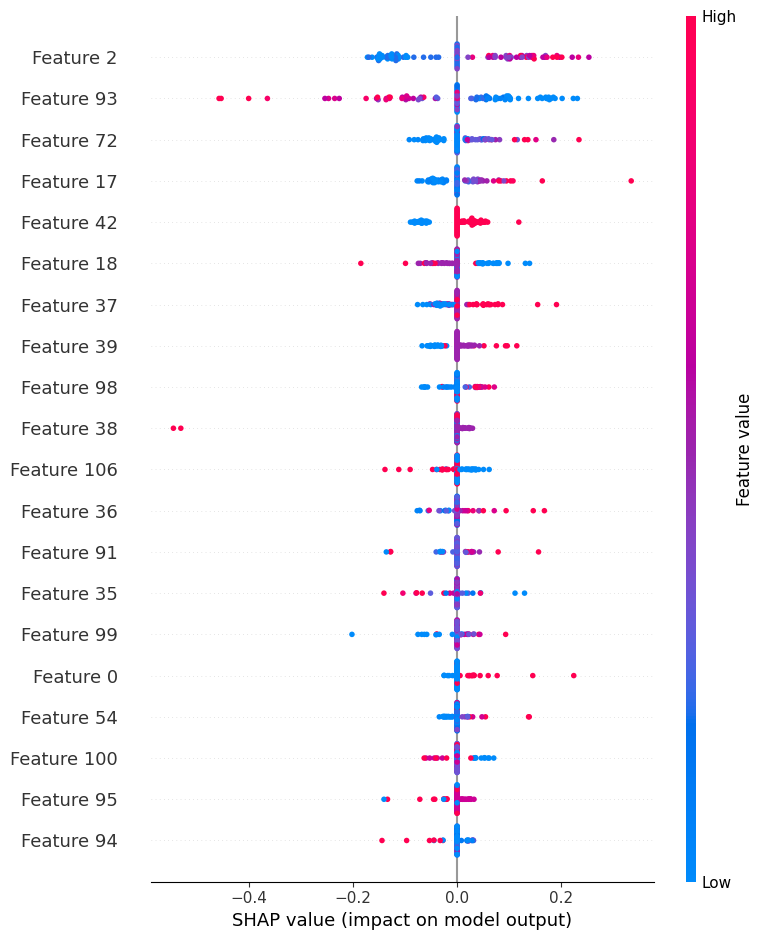

In [ ]:
explainer = shap.KernelExplainer(svc_model.predict, X_train_transformed[:100])
shap_values = explainer.shap_values(X_train_transformed[:100])

shap.summary_plot(shap_values, X_train_transformed[:100])

In [ ]:
# Get numeric feature names (unchanged)
numeric_features = numeric_md2020

# Get categorical feature names after one-hot encoding
# You need to access the OneHotEncoder
ohe = preprocessor.named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical_2020)

# Combine numeric and encoded categorical feature names
all_feature_names = np.concatenate([numeric_features, ohe_feature_names])

NameError: name 'categorical_2020' is not defined

In [ ]:
shap.summary_plot(shap_values, X_train_transformed[:100], feature_names=all_feature_names)

mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_df = pd.DataFrame({
    "feature": all_feature_names,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False)

print(shap_df.head(10))